__Fraud Detection Using Isolation Forest Algorithm__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('creditcard_training_set_v4.csv')

In [3]:
print(data.columns)

Index(['Seconds since reference time', 'Amount',
       'Fraud? (1: Fraud, 0:  No Fraud)', 'Feature 1', 'Feature 2',
       'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7',
       'Feature 8', 'Feature 9', 'Feature 10', 'Feature 11', 'Feature 12',
       'Feature 13', 'Feature 14', 'Feature 15', 'Feature 16', 'Feature 17',
       'Feature 18', 'Feature 19', 'Feature 20', 'Feature 21', 'Feature 22',
       'Feature 23', 'Feature 24', 'Feature 25', 'Feature 26', 'Feature 27',
       'Feature 28', 'Feature 29'],
      dtype='object')


In [4]:
data = data.sample(frac= 1, random_state = 1)
print(data.shape)
print(data.describe())

(227844, 32)
       Seconds since reference time         Amount  \
count                 227844.000000  227844.000000   
mean                   79042.504749      90.825317   
std                    39505.785991     250.504249   
min                        0.000000       0.000000   
25%                    47694.000000       6.000000   
50%                    73261.000000      23.400000   
75%                   120396.000000      79.990000   
max                   145245.000000   19656.530000   

       Fraud? (1: Fraud, 0:  No Fraud)      Feature 1      Feature 2  \
count                    227844.000000  227844.000000  227844.000000   
mean                          0.001830       0.049116      -0.005509   
std                           0.042742       0.933915       0.885633   
min                           0.000000      -4.498945     -14.129855   
25%                           0.000000      -0.543185      -0.478638   
50%                           0.000000       0.120841       0.059919

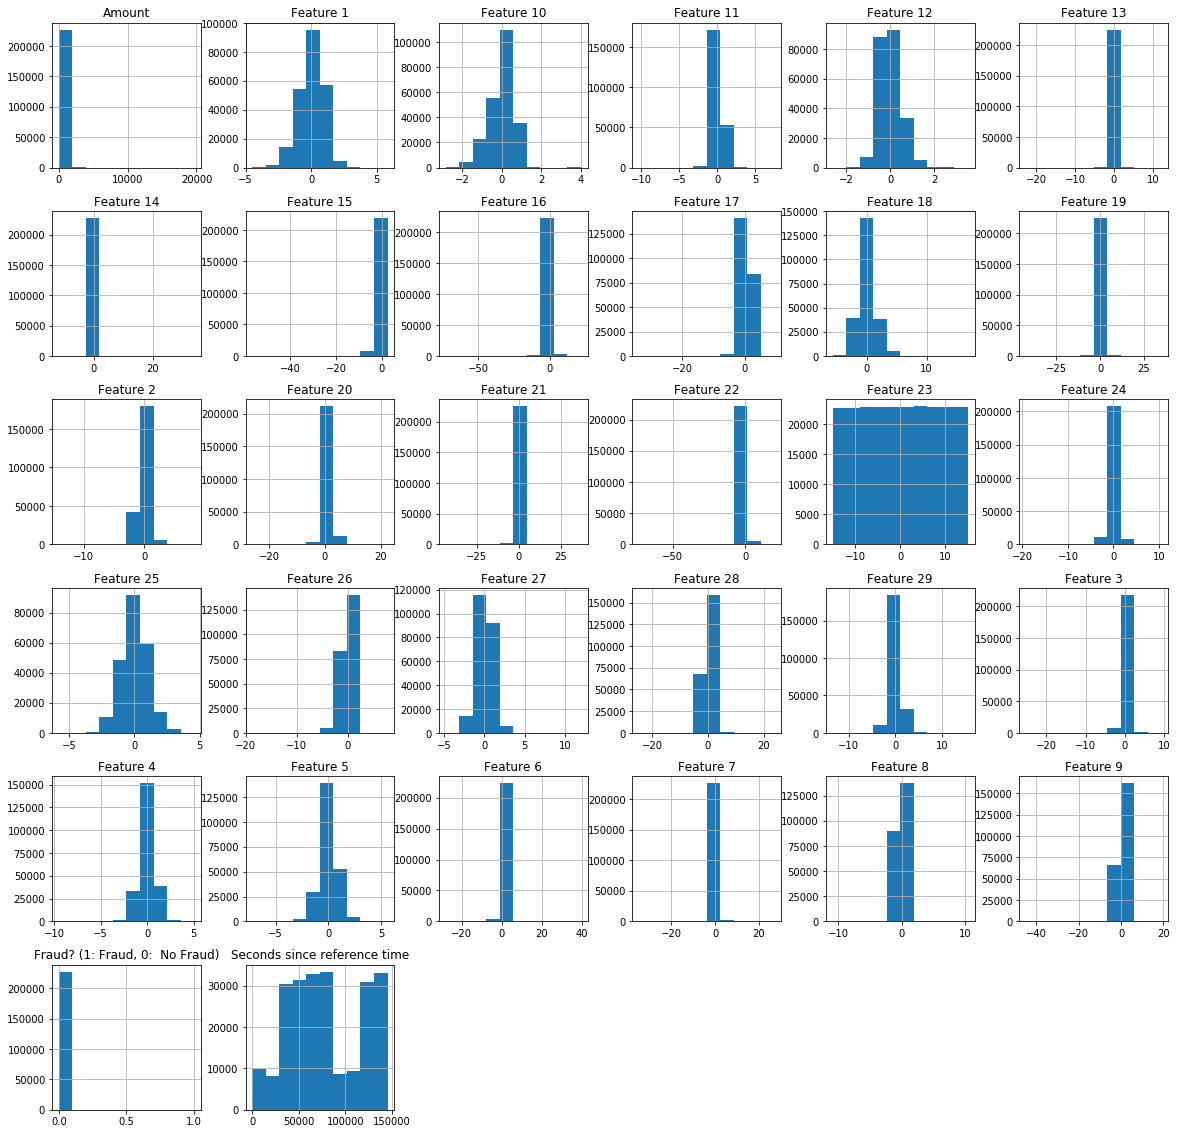

In [5]:
data.hist(figsize = (20, 20))
plt.show()

In [6]:
Fraud = data[data['Fraud? (1: Fraud, 0:  No Fraud)'] == 1]
Valid = data[data['Fraud? (1: Fraud, 0:  No Fraud)'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(data[data['Fraud? (1: Fraud, 0:  No Fraud)'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Fraud? (1: Fraud, 0:  No Fraud)'] == 0])))

0.0018335553826062869
Fraud Cases: 417
Valid Transactions: 227427


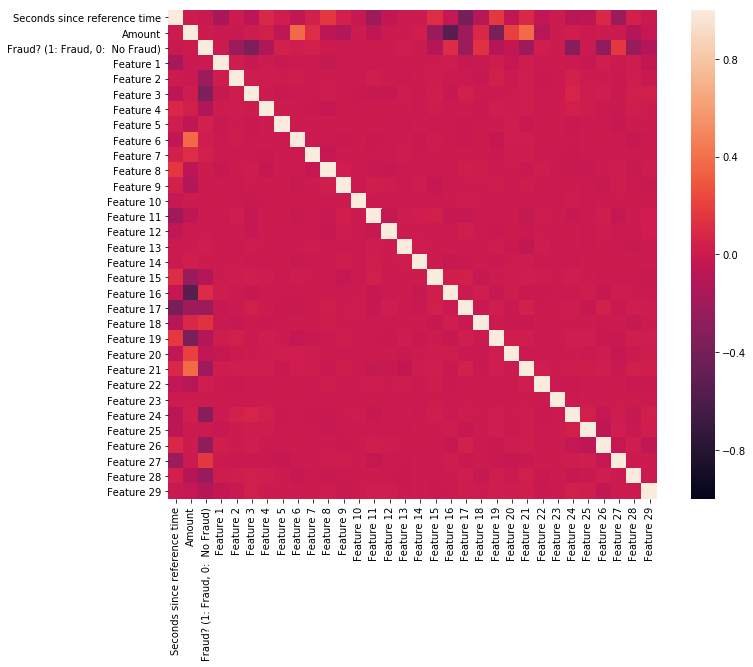

In [7]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = 1, vmin = -1, square = True)
plt.show()

In [8]:
columns = data.columns.tolist()

columns = [c for c in columns if c not in ["Fraud? (1: Fraud, 0:  No Fraud)"]]

target = "Fraud? (1: Fraud, 0:  No Fraud)"

X = data[columns]
Y = data[target]

print(X.shape)
print(Y.shape)

(227844, 31)
(227844,)


In [9]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest, GradientBoostingClassifier
from sklearn.neighbors import LocalOutlierFactor

state = 1



classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state),
}

C:\Users\ace_n\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [10]:
n_outliers = len(Fraud)


for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    if clf_name == "Isolation Forest":
        clf.fit(X)
        y_pred = clf.predict(X)
        scores_pred = clf.decision_function(X)

C:\Users\ace_n\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [11]:
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

Isolation Forest: 559
0.9975465669493162
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    227427
          1       0.33      0.33      0.33       417

avg / total       1.00      1.00      1.00    227844



__Conclusion__

After carrying out the isolation forest algorithm, we obtained a 99.75% accuracy in predicting the correct fraud value. 
However, this was expected as the data with a fraud value of 1 only took up a small percentage of the whole dataset. As such we need to dig deeper.
From the classification report, our model has a 100% accuracy in identifying non-fraud cases and a 33% accuracy in identifying fraud cases.

A 33% success rate in the detection of fraud cases shows that the model has the ability to train itself.
However, this means that 2 out of 3 fraud cases would not be identified and is an area for improvement. 
Some features which display little to no correlation can also be removed to reduce overfitting.
Furthermore, the isolation forest algorithm utilises decision trees to isolate anomalies which enables the detection of fraud. However, if fraud cases were to occupy a larger proportion of the data, the isolation forest may not be the best algorithm to detect these cases.
